In [72]:
#Importing libraries
from tweepy import OAuthHandler
from tweepy import Cursor
from tweepy import API
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
# Getting twitter Authentication credentials
CONSUMER_KEY="eNCvgAkNL0dTVBBYBmE77nK1V"
CONSUMER_SECRET="pSxbPRjr9I66Voc8U2reOhdsz8uWIfcv16eQavCGMLbmsfEmDN"
ACCESS_TOKEN="1382621002832572419-6BwkQjZ0GNSnjW64ZMmEiHWr4xPgc6"
ACCESS_TOKEN_SECRET="snWkVsM0N0SAtTKcJk5NEbsJjBFt22tbRluOMrQHxD8QF"
auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

# Create API object
api=API(auth,wait_on_rate_limit=True)

# Extracting tweets from twitter
searchAbout=input("Enter a product name:  ")
no_of_Tweets=int(input("Enter no of Tweets  :  "))
posts=Cursor(api.search, q=searchAbout, lang="en", since="2020-01-01").items(no_of_Tweets)

Enter a product name:  Redmi
Enter no of Tweets  :  100


In [74]:
#Creating a dataframe with a column called Tweets
df=pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])

#Showing data
df

,Tweets
0,RT @manukumarjain: #RedmiNote10S: sale is live...
1,@manukumarjain @RedmiIndia I love the #Blue ⛲ ...
2,RT @TechUnboxing5: Redmi Watch Indian Variant ...
3,@RedmiIndia @amazonIN In my life time I haven'...
4,@manukumarjain @RedmiIndia #RedmiNote10S: 🥳\n...
...,...
95,@manukumarjain @RedmiIndia #RedmiNote10S: sale...
96,RT @manukumarjain: #RedmiNote10S: sale is live...
97,RT @manukumarjain: #RedmiNote10S: sale is live...
98,RT @manukumarjain: #RedmiNote10S: sale is live...


In [75]:
#Removing un usefull words and symbols from the Tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9_s:s]+','',text)     # Removed @...
    text=re.sub(r'#[A-Za-z0-9_s:s]+','',text)     # Removed #...
    text=re.sub(r'hmm ','',text)                   # Removed huu
    text=re.sub(r'[Hh]i ','',text)                 # Removed Hi
    text=re.sub(r'and ','',text)                   # Removed and
    text=re.sub(r'oh ','',text)                   # Removed oh
    text=re.sub(r'via ','',text)                  # Removed via
    text=re.sub(r'RT[\s]+','',text)               # Removed RT
    text=re.sub(r'https[:s]\/\/\S+','',text)      # Removed https link
    return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df                                                #Showing cleaned text

,Tweets
0,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...
1,I love the ⛲ colour \n \n\nI 💕
2,Redmi Watch Indian Variant Unboxing 🔥| Built I...
3,In my life time I haven't seen any of Xiaomi...
4,🥳\n\n📱Super \n☀️ brightness\nProcessor: \n...
...,...
95,sale is live!🥳\n\nSavage meets Stunning:\n📱...
96,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...
97,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...
98,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...


In [76]:
# Creat a fun. to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creat a fun. to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creat two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000
1,I love the ⛲ colour \n \n\nI 💕,0.600000,0.500000
2,Redmi Watch Indian Variant Unboxing 🔥| Built I...,0.000000,0.000000
3,In my life time I haven't seen any of Xiaomi...,0.283333,-0.033333
4,🥳\n\n📱Super \n☀️ brightness\nProcessor: \n...,0.000000,0.000000
...,...,...,...
95,sale is live!🥳\n\nSavage meets Stunning:\n📱...,1.000000,0.500000
96,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000
97,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000
98,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000


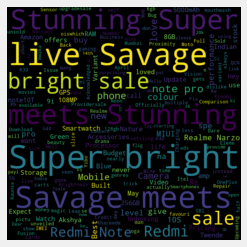

In [77]:
# Plot the  word cloud
allWords=''.join( [twts for twts in df['Tweets']])
wc=WordCloud(width=800, height=800, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [78]:
# Creat a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000,Positive
1,I love the ⛲ colour \n \n\nI 💕,0.600000,0.500000,Positive
2,Redmi Watch Indian Variant Unboxing 🔥| Built I...,0.000000,0.000000,Neutral
3,In my life time I haven't seen any of Xiaomi...,0.283333,-0.033333,Negative
4,🥳\n\n📱Super \n☀️ brightness\nProcessor: \n...,0.000000,0.000000,Neutral
...,...,...,...,...
95,sale is live!🥳\n\nSavage meets Stunning:\n📱...,1.000000,0.500000,Positive
96,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000,Positive
97,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000,Positive
98,sale is live!🥳\n\nSavage meets Stunning:\n📱Sup...,0.900000,0.600000,Positive


In [79]:
# Print all positive tweets
j=1
for i in range(0, df.shape[0]):
    if(df['Analysis'][i]== "Positive"):
        print(str(j)+')'+df['Tweets'][i]+'\n')
        j=j+1
ptweets=j-1;

1)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

2)  I love the  ⛲ colour 
 

I 💕

3)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

4)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

5)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

6)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

7)What if we show you a magic trick?

In less than 15 mins, you can have this beauty in your carts not just in this pictu…

8)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

9)Redmi 9i
Nature Green

For Best offers call 
Pricing like never before.
Akshya Mobiles &amp; Accessories Mobile Ph…

10)  🥳

📱Super 
☀️ bright
Processor: 
Camera: 
Charging:  

My favouri… 

11)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

12)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

13)sale is live!🥳

Savage meets Stunning:
📱Super 
☀️ bright
🕹️
📸
🎶…

14)sale is live!🥳

Savage meets St

In [80]:
# Print all negative tweets
j=1
for i in range(0, df.shape[0]):
    if(df['Analysis'][i]== "Negative"):
        print(str(j)+')'+df['Tweets'][i]+'\n')
        j=j+1
ntweets=j-1;

1)  In my life time I haven't seen any of Xiaomi or mi phone gone unsold for nearly about half an… 

2)  
Hello there, Can you please provide Game Turbo 3.0 to Redmi Note 8 Pro with MIUI 12.5 upda… 



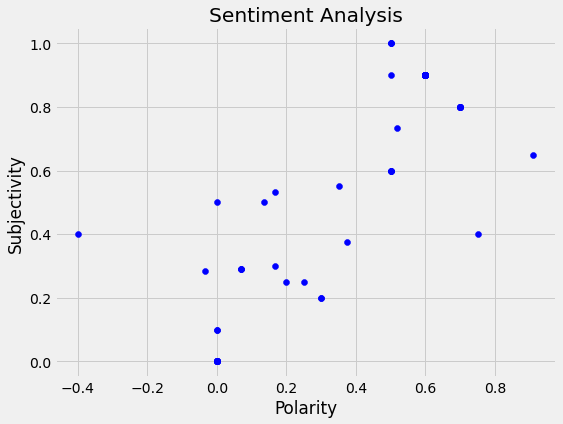

In [81]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [82]:
# Get the percentage of positive tweets
print('Percentage of Positive tweets:')
round((ptweets/df.shape[0])*100,1)

Percentage of Positive tweets:


82.0

In [83]:
# Get the percentage of negative tweets
print('Percentage of Negative tweets:')
round((ntweets/df.shape[0])*100,1)

Percentage of Negative tweets:


2.0

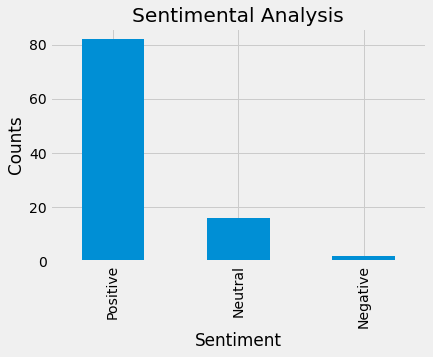

In [84]:
# Plot and visualize the counts of sentimental analysis
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()